<ipython-input-4-a7a405e4d91c>:88: ComplexWarning: Casting complex values to real discards the imaginary part
  condition_numbers[n][l]=condition_number;


[0.05, 0.1, 0.15, 0.2, 0.25]
[4.01861219 1.75127757 1.78048562 2.89790909 5.14222351]


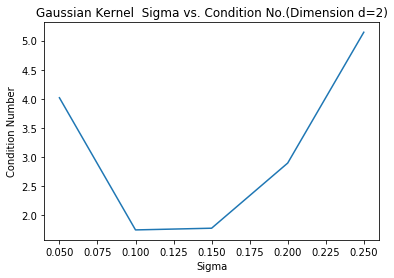

In [4]:
import numpy as np
from math import pi,e
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import scipy.linalg as la
import random

N=200
M=10

def transpose(A,B): 
    #B=np.zeros((M,N))
    for i in range(M): 
        for j in range(N): 
            B[i][j] = A[j][i]
    #return B
            
def matrix_multiplication(X, Y,result):
    #result=np.zeros((N,N))
    for i in range(len(X)):
    # iterate through columns of Y
        for j in range(len(Y[0])):
       # iterate through rows of Y
           for k in range(len(Y)):
                result[i][j] += X[i][k] * Y[k][j]
    #return result

def gaussian_kernel(distances,sigma=1.0): 
    kernel_vals = np.exp( - (distances/sigma) **2) 
    return kernel_vals

dim=2
random.seed(42)
actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))
condition_numbers=np.zeros((50,5))
sigmas=[0.05,0.10,0.15,0.20,0.25]

for n in range(50):
    l=0
    for sigma in sigmas:
        #random.seed(actual_data) 
        #actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))
        #whitened = whiten(actual_data)
        #book = np.array((whitened[0],whitened[2]))
        centroid, label = kmeans2(actual_data,M,minit='points')

       # print(codebook) #printing centroids

        actual_distances = np.zeros((N,M))


        for row in range(N):
            for col in range(M):
                for i in range(dim):
                    actual_distances[row,col]+=((centroid[col])[i]-(actual_data[row])[i])**2

        for row in range(N):
            for col in range(M):
                actual_distances[row,col]=actual_distances[row,col]**0.5

      
        kernel_vals = gaussian_kernel(actual_distances,sigma)
        #print(kernel_vals)
        kernel_vals_transpose=np.zeros((M,N))
        transpose(kernel_vals,kernel_vals_transpose)
        k_vals=np.zeros((M,M))
        matrix_multiplication(kernel_vals_transpose,kernel_vals,k_vals)

        #print(k_vals)
        eigvals, eigvecs = la.eig(k_vals)
        #eigvals=eigvals.real
        #print(eigvals)
        singular_values=eigvals**0.5
        #print(singular_values)
        maximum_sv=singular_values[0]

        for s in singular_values:
            if s>maximum_sv:
                maximum_sv=s
        #print(maximum_sv)

        minimum_sv=singular_values[0]
        for s in singular_values:
            if s<minimum_sv:
                minimum_sv=s;
        #print(minimum_sv)
        condition_number=maximum_sv/minimum_sv
        condition_numbers[n][l]=condition_number;
        l=l+1
        #print(maximum_sv/minimum_sv);
        #print(sigma,condition_number)
        
        
#print(condition_numbers)
        
averaged_condition_numbers=np.zeros(5)
temp_sum=0
for col in range(5):
    for row in range(50):
        temp_sum+=condition_numbers[row][col]
    averaged_condition_numbers[col]=temp_sum/50;
    temp_sum=0;
print(sigmas)
print(averaged_condition_numbers)
fig, ax = plt.subplots()
plt.plot(sigmas,averaged_condition_numbers)
ax.set_title("Gaussian Kernel  Sigma vs. Condition No.(Dimension d="+str(dim)+")")
plt.savefig('Gaussian Kernel conditioning for dimension 2')
ax.set_xlabel('Sigma')
ax.set_ylabel('Condition Number')
plt.show()

            
    

<ipython-input-5-eb1800021dc6>:89: ComplexWarning: Casting complex values to real discards the imaginary part
  condition_numbers[n][l]=condition_number;


[[1.51360954e+01 3.20707219e+00 1.01224750e+01 2.07227229e+01
  3.56442736e+01 5.36791304e+01 7.32679469e+01 1.06299947e+02
  1.17082003e+02]
 [1.25673152e+02 3.37144813e+00 9.95897679e+00 1.98926675e+01
  3.50010967e+01 5.41212697e+01 7.55067325e+01 9.97518996e+01
  1.46330432e+02]
 [1.04637464e+02 3.08234765e+00 1.08913794e+01 2.09719717e+01
  3.40807762e+01 5.09755977e+01 6.75543517e+01 9.28914574e+01
  1.22083637e+02]
 [3.96217814e+01 3.20704451e+00 1.03280482e+01 2.01949308e+01
  3.41252202e+01 5.07666046e+01 7.32567232e+01 9.00437463e+01
  1.18317458e+02]
 [2.48143465e+01 3.70049122e+00 9.77975279e+00 2.28328591e+01
  3.91424125e+01 5.28967730e+01 7.02864732e+01 9.92821808e+01
  1.31103614e+02]
 [5.48633889e+01 2.81119480e+00 1.06647508e+01 2.12741138e+01
  3.67912554e+01 5.69768352e+01 7.10329823e+01 9.24607967e+01
  1.18178258e+02]
 [8.45222951e+00 3.18161906e+00 1.04347647e+01 2.38107472e+01
  3.27389314e+01 4.78838396e+01 6.65418911e+01 1.01872533e+02
  1.21599126e+02]
 [2.56

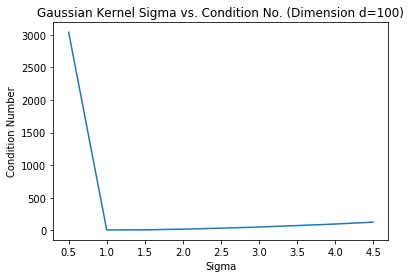

In [5]:
import numpy as np
from math import pi,e
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import scipy.linalg as la
import random

N=200
M=10

def transpose(A,B): 
    #B=np.zeros((M,N))
    for i in range(M): 
        for j in range(N): 
            B[i][j] = A[j][i]
    #return B
            
def matrix_multiplication(X, Y,result):
    #result=np.zeros((N,N))
    for i in range(len(X)):
    # iterate through columns of Y
        for j in range(len(Y[0])):
       # iterate through rows of Y
           for k in range(len(Y)):
                result[i][j] += X[i][k] * Y[k][j]
    #return result

def gaussian_kernel(distances,sigma=1.0): 
    kernel_vals = np.exp( - (distances/sigma) **2) 
    return kernel_vals

dim=100
random.seed(42)
actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))
condition_numbers=np.zeros((50,9))
sigmas=[0.50,1.0,1.5,2.0,2.5,3,3.5,4,4.5]

for n in range(50):
    l=0
    for sigma in sigmas:
        #random.seed(actual_data) 
        #actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))
        #whitened = whiten(actual_data)
        #book = np.array((whitened[0],whitened[2]))
        centroid, label = kmeans2(actual_data,M,minit='points')

       # print(codebook) #printing centroids

        actual_distances = np.zeros((N,M))


        for row in range(N):
            for col in range(M):
                for i in range(dim):
                    actual_distances[row,col]+=((centroid[col])[i]-(actual_data[row])[i])**2

        for row in range(N):
            for col in range(M):
                actual_distances[row,col]=actual_distances[row,col]**0.5
                
        kernel_vals = gaussian_kernel(actual_distances,sigma)
        #print(kernel_vals)
        kernel_vals_transpose=np.zeros((M,N))
        transpose(kernel_vals,kernel_vals_transpose)
        k_vals=np.zeros((M,M))
        matrix_multiplication(kernel_vals_transpose,kernel_vals,k_vals)

        #print(k_vals)
        eigvals, eigvecs = la.eig(k_vals)
        #eigvals=eigvals.real
        #print(eigvals)
        singular_values=eigvals**0.5
        #print(singular_values)
        maximum_sv=singular_values[0]

        for s in singular_values:
            if s>maximum_sv:
                maximum_sv=s
        #print(maximum_sv)

        minimum_sv=singular_values[0]
        for s in singular_values:
            if s<minimum_sv:
                minimum_sv=s;
        #print(minimum_sv)
        if (minimum_sv==0):
            minimum_sv=0.1
        condition_number=maximum_sv/minimum_sv
        condition_numbers[n][l]=condition_number;
        l=l+1
        #print(maximum_sv/minimum_sv);
        #print(sigma,condition_number)
        
        
print(condition_numbers)
        
averaged_condition_numbers=np.zeros(9)
temp_sum=0
for col in range(9):
    for row in range(50):
        temp_sum+=condition_numbers[row][col]
    averaged_condition_numbers[col]=temp_sum/50;
    temp_sum=0;
    
print(sigmas)
print(averaged_condition_numbers)

fig, ax = plt.subplots()
plt.plot(sigmas,averaged_condition_numbers)
ax.set_title("Gaussian Kernel Sigma vs. Condition No. (Dimension d="+str(dim)+")")
ax.set_xlabel('Sigma')
ax.set_ylabel('Condition Number')
plt.savefig('Gaussian Kernel conditioning for dimension 100')
plt.show()

            
    